In [1]:
#pip install pandas seaborn matplotlib gradio ollama

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic Dataset
url = r"D:\GenAI\Expert-Generative-AI-and-Agenetic-Ai-developer\eda-integration-llm-titanic-data\titanic_ dataset_final.csv"
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Display dataset info
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [4]:
# Missing Values Check
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


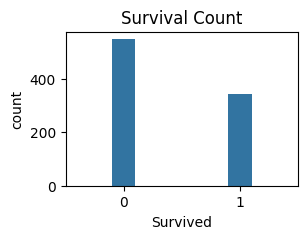

In [5]:
# Survival Rate Visualization
plt.figure(figsize=(3, 2))   # width, height in inches
sns.countplot(x='Survived', data=df, width=0.2)
plt.title("Survival Count")
plt.show()

In [7]:
import sys
!{sys.executable} -m pip install ollama


  Using cached pydantic-2.12.5-py3-none-any.whl (463 kB)
  Using cached typing_inspection-0.4.2-py3-none-any.whl (14 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
  Using cached pydantic_core-2.41.5-cp310-cp310-win_amd64.whl (2.0 MB)



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import ollama
print("✅ ollama imported successfully")


✅ ollama imported successfully


In [9]:
def generate_insights(df_summary):
    prompt = f"""
Analyze the following Titanic dataset summary
and provide key insights in bullet points:

{df_summary}
"""
    response = ollama.chat(
        model="gemma3:270m",
        messages=[{"role": "user", "content": prompt}]
    )
    return response["message"]["content"]

summary = df.describe().to_string()
insights = generate_insights(summary)

print("\n🔍 AI Generated Insights:\n")
print(insights)


🔍 AI Generated Insights:

Here's the analysis of the dataset summary:

**Key Insights:**

*   **Mean:** The mean of the passenger ID values is 446.000000, which is 446.000000. This suggests that the passenger ID values represent a relatively uniform distribution across the dataset.
*   **Standard Deviation:** The standard deviation of the passenger ID values is 0.806057. This indicates that the passenger ID values are relatively spread across the dataset.
*   **Minimum:** The minimum passenger ID value is 0.000000. This suggests that the passenger ID values are relatively low, suggesting that the dataset may be relatively small.
*   **Maximum:** The maximum passenger ID value is 1.000000. This indicates that the passenger ID values are relatively high, suggesting that the dataset may be relatively large.
*   **Median:** The median of the passenger ID values is 0.000000. This indicates that the passenger ID values are relatively evenly distributed across the dataset.

**In Summary:**



In [11]:
import sys
!{sys.executable} -m pip install gradio


  Using cached gradio-6.2.0-py3-none-any.whl (23.0 MB)
  Using cached uvicorn-0.40.0-py3-none-any.whl (68 kB)
  Using cached tomlkit-0.13.3-py3-none-any.whl (38 kB)
  Using cached fastapi-0.128.0-py3-none-any.whl (103 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl (15 kB)
  Using cached aiofiles-24.1.0-py3-none-any.whl (15 kB)
  Using cached huggingface_hub-1.2.4-py3-none-any.whl (520 kB)
  Using cached brotli-1.2.0-cp310-cp310-win_amd64.whl (369 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl (32 kB)
  Using cached gradio_client-2.0.2-py3-none-any.whl (55 kB)
  Using cached groovy-0.1.2-py3-none-any.whl (14 kB)
  Using cached orjson-3.11.5-cp310-cp310-win_amd64.whl (133 kB)
  Using cached python_multipart-0.0.21-py3-none-any.whl (24 kB)
  Using cached safehttpx-0.1.7-py3-none-any.whl (9.0 kB)
  Using cached typer-0.21.1-py3-none-any.whl (47 kB)
  Using cached starlette-0.50.0-py3-none-any.whl (74 kB)
  Using cached ffmpy-1.0.0-py3-none-any.whl (5.6 kB)
  Using ca


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import gradio as gr
print("✅ gradio imported")

✅ gradio imported


In [13]:


def eda_analysis(file):
    df = pd.read_csv(file.name)
    summary = df.describe().to_string()
    insights = generate_insights(summary)
    return insights

# Create Web Interface
demo = gr.Interface(fn=eda_analysis, inputs="file", outputs="text", title="AI-Powered EDA with Mistral")

# Launch App
demo.launch(share=True)  # Use share=True for Google Colab


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://dcb883403f746e2cf8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
